1 1
1 2
1 3
1 4
1 5
1 6
1 7
2 1
2 2
2 3
2 4
2 5
2 6
2 7
3 1
3 2
3 3
3 4
3 5
3 6
3 7
4 1
4 2
4 3
4 4
4 5
4 6
4 7
5 1
5 2
5 3
5 4
5 5
5 6
5 7
6 1
6 2
6 3
6 4
6 5
6 6
6 7
7 1
7 2
7 3
7 4
7 5
7 6
7 7
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 1
9 2
9 3
9 4
9 5
9 6
9 7
10 1
10 2
10 3
10 4
10 5
10 6
10 7
11 1
11 2
11 3
11 4
11 5
11 6
11 7
12 1
12 2
12 3
12 4
12 5
12 6
12 7
13 1
13 2
13 3
13 4
13 5
13 6
13 7
14 1
14 2
14 3
14 4
14 5
14 6
14 7
15 1
15 2
15 3
15 4
15 5
15 6
15 7
16 1
16 2
16 3
16 4
16 5
16 6
16 7
17 1
17 2
17 3
17 4
17 5
17 6
17 7
18 1
18 2
18 3
18 4
18 5
18 6
18 7
19 1
19 2
19 3
19 4
19 5
19 6
19 7
20 1
20 2
20 3
20 4
20 5
20 6
20 7
21 1
21 2
21 3
21 4
21 5
21 6
21 7
22 1
22 2
22 3
22 4
22 5
22 6
22 7
23 1
23 2
23 3
23 4
23 5
23 6
23 7
24 1
24 2
24 3
24 4
24 5
24 6
24 7
25 1
25 2
25 3
25 4
25 5
25 6
25 7
26 1
26 2
26 3
26 4
26 5
26 6
26 7
27 1
27 2
27 3
27 4
27 5
27 6
27 7
28 1
28 2
28 3
28 4
28 5
28 6
28 7
29 1
29 2
29 3
29 4
29 5
29 6
29 7
30 1
30 2
30 3
30 4
30 5
30 6
30 7
31 1
31 2
31 

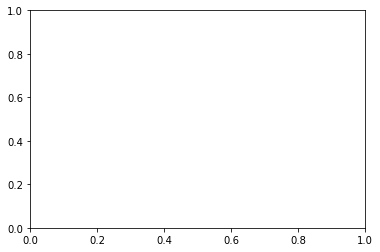

In [1]:
def orl_face_training():
    import numpy as np 
    import matplotlib.image as mimg
    import matplotlib.pyplot as plt
    from skimage import feature
    from sklearn import svm
    import joblib
    train_data=np.zeros((7*41,280))
    train_label=np.zeros((7*41))
    count=-1
    #plt.figure(1)
    #plt.ion()
    # feature extraction 
    for i in range(1,41):
        for j in range(1,8):
            plt.cla()
            count=count+1
            path = '/Users/dell/AppData/Local/Programs/Python/Python37-32/orl_face/orl_face/u%d/%d.png'%(i,j)
            im = mimg.imread(path)
            feat,hog_image = feature.hog(im,orientations=8,pixels_per_cell=(16,16),
                                         visualize=True,block_norm='L2-Hys',
                                         cells_per_block=(1,1))
            train_data[count,:]=feat.reshape(1,-1)
            train_label[count]=i
            #plt.subplot(2,1,1)
            #plt.imshow(im,cmap='gray')
            #plt.subplot(2,1,2)
            #plt.imshow(hog_image,cmap='gray')
            #plt.pause(0.3)
            print(i,j)

    # model creation
    svm_model = svm.SVC(kernel='poly',gamma='scale')

    # train the model
    svm_model = svm_model.fit(train_data,train_label)

    joblib.dump(svm_model,'svm_face_train_modelnew.pkl')

    print('training done ')
orl_face_training()




In [9]:
# pip install opencv-python 

def demo():
    global n
    import cv2
    import matplotlib.pyplot as plt
    n=input("name: ")
    num_of_sample = 100
    vid = cv2.VideoCapture(0) # to open the camera
    # haar cascade for frontal face
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    iter1=0
    while(iter1<num_of_sample):
        r,frame = vid.read();# capture a single frame
        frame = cv2.resize(frame,(640,480)) # resizig the frame
        im1 = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)# gray scale conversion of
        # color image
        face=face_cascade.detectMultiScale(im1)
        for x,y,w,h in (face):
            # [255,0,0] #[B,G,R] 0 to 255 
            cv2.rectangle(frame,(x,y),(x+w,y+h),[0,0,255],4)
            iter1=iter1+1
            im_f = im1[y:y+h,x:x+w]
            im_f = cv2.resize(im_f,(112,92))#orl face matching size
            cv2.putText(frame,'sample no.'+str(iter1),(x,y), cv2.FONT_ITALIC, 1,
                       (255,0,255),2,cv2.LINE_AA)
            path2 = 'C:/Users/dell/AppData/Local/Programs/Python/Python37-32/orl_face/orl_face/u41/%d.png'%(iter1) # path to save the image
            cv2.imwrite(path2,im_f) # to save the image 

        cv2.imshow('frame',frame)# display
        cv2.waitKey(1)
    vid.release()
    cv2.destroyAllWindows()
demo()






name:prerna


In [ ]:
# pip install opencv-python 
def real_testing():
    import cv2
    import matplotlib.pyplot as plt
    from skimage import feature
    import joblib
    svm_model=joblib.load('svm_face_train_modelnew.pkl')
    num_of_sample = 200
    vid = cv2.VideoCapture(0) # to open the camera
    # haar cascade for frontal face
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    iter1=0
    while(iter1<num_of_sample):
        r,frame = vid.read();# capture a single frame
        frame = cv2.resize(frame,(640,480)) # resizig the frame
        im1 = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)# gray scale conversion of
        # color image
        face=face_cascade.detectMultiScale(im1)
        for x,y,w,h in (face):
            # [255,0,0] #[B,G,R] 0 to 255 
            cv2.rectangle(frame,(x,y),(x+w,y+h),[0,0,255],4)
            iter1=iter1+1
            im_f = im1[y:y+h,x:x+w]
            im_f = cv2.resize(im_f,(112,92))#orl face matching size

            feat,hog_image = feature.hog(im_f,orientations=8,pixels_per_cell=(16,16),
                                         visualize=True,block_norm='L2-Hys',
                                         cells_per_block=(1,1))
            val1=svm_model.predict(feat.reshape(1,-1))
            name=n
            str1=" "
            cv2.putText(frame,name,(x,y), cv2.FONT_ITALIC, 1,
                       (255,0,255),2,cv2.LINE_AA)


        cv2.imshow('frame',frame)# display
        cv2.waitKey(1)
    vid.release()
    cv2.destroyAllWindows()
real_testing()